# **_Chess Piece Classification_**

### __*This CNN is supposed to determine what kind of Chess Piece is in the Image*__

<br>

### __*Import Libraries and choose the device*__

In [5]:
# Import of the Libraries
import os
import CNN

# Torch libraries
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader

# Device config (Pick your set-up)
# GPU = torch.device('cpu')  # CPU
GPU = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # NVIDIA GPUs
# GPU = torch.device('mps' if torch.has_mps else 'cpu')  # ARM GPUs (M1, M2, ...)
print('Using the Processor') if GPU == torch.device('cpu') else print('Using the Graphics Card')

Using the Graphics Card


<br>

### __*Training Preparation (Set all variables here)*__

In [6]:
# Hyper-parameters
num_epochs = 25         # How many times to repeat learning
batch_size = 8          # Number of images to send at once
learning_rate = 0.001    # How quickly should it learn

# Image Dimensions
IMG_SIZE = 85           # 85*85 pixels
COLOUR_SIZE = 1

# Define the directory
FILE_PATH = './data/chess/pieces'           # Sub-Folders Location
CSV_PATH = './data/chess/data.csv'          # CSV Location
TRAIN_CSV = './data/chess/train_data.csv'   # Train CSV Location
TEST_CSV = './data/chess/test_data.csv'     # Test CSV Location
CATEGORIES = os.listdir(FILE_PATH)          # Turn Sub-Folder names into a list
N_CLASSES = len(CATEGORIES)                 # Number of different classes

# TODO: Create a normalization function with advanced formula
# Transformation
transformer = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((IMG_SIZE, IMG_SIZE)),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomVerticalFlip(),
    #torchvision.transforms.Grayscale()
])

# Create the .csv file
CNN.dataset.create_csv(FILE_PATH, CSV_PATH, rewrite=True)

# Create the Datasets
dataset = CNN.dataset.CustomDataset(FILE_PATH, CSV_PATH, transform=transformer)

# Get Normalizer
normal_loader = DataLoader(dataset=dataset, batch_size=len(dataset))
data = next(iter(normal_loader))
MEAN = data[0].mean()
STD = data[0].std()
print(MEAN, STD)

print(CNN.dataset.get_normal(FILE_PATH, IMG_SIZE, IMG_SIZE, 'rgb'))

# Normalized Transformation
trans_normal = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((IMG_SIZE, IMG_SIZE)),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomVerticalFlip(),
    torchvision.transforms.Grayscale(),
    torchvision.transforms.Normalize(MEAN, STD)
])

# Create the .csv file & dictionary
indexing = CNN.dataset.create_csv(FILE_PATH, train_csv=TRAIN_CSV, test_csv=TEST_CSV,
                      rewrite=True, split=True, test_ratio=0.2, mul=2)

# Create the Datasets
train_dataset = CNN.dataset.CustomDataset(FILE_PATH, TRAIN_CSV, transform=trans_normal)
test_dataset = CNN.dataset.CustomDataset(FILE_PATH, TEST_CSV, transform=trans_normal)

# Create the DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size)

# Create the Model
model = CNN.model.ConvNet(COLOUR_SIZE, N_CLASSES).to(GPU)

# Choose type of Loss & Optimization function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

tensor(0.5586) tensor(0.2473)
[tensor(1.6758), tensor(1.9819)]


#### __*Look at some data*__

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


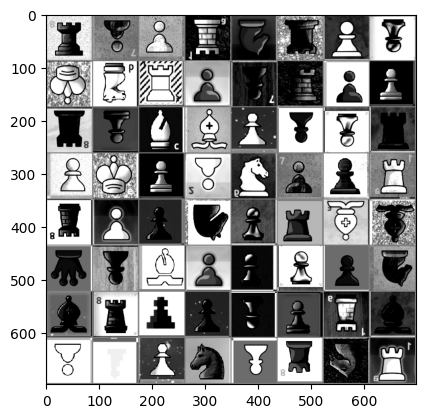

Batch size: 64 | Colour size: 1 | Image Size: 85*85 pixels


,Class,Train Data,Test Data,Total
0,king,56,6,62
1,pawn,384,47,431
2,rook,116,14,130
3,queen,56,6,62
4,bishop,108,13,121
5,knight,114,14,128
,,,,
T:,6,834,100,934


In [7]:
# Get dataset overview
CNN.visual.overview(train_dataset, test_dataset, indexing)

<br>

### __*Training Loop*__

Epoch 19 / 25 | Step 105 / 105 | Loss: 0.0001
Epoch 20 / 25 | Step 105 / 105 | Loss: 0.0001
Epoch 21 / 25 | Step 105 / 105 | Loss: 0.0001
Epoch 22 / 25 | Step 105 / 105 | Loss: 0.0000
Epoch 23 / 25 | Step 105 / 105 | Loss: 0.0000
Epoch 24 / 25 | Step 105 / 105 | Loss: 0.0000
Epoch 25 / 25 | Step 105 / 105 | Loss: 0.0000
--- Training Finished ---


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Class: knight | Predicted: queen


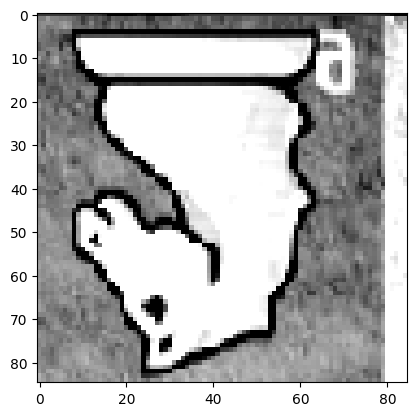

Accuracy of the Model: 99.00 %
Accuracy of king: 100.00 %
Accuracy of pawn: 100.00 %
Accuracy of rook: 100.00 %
Accuracy of queen: 100.00 %
Accuracy of bishop: 100.00 %
Accuracy of knight: 92.86 %
Epoch 1 / 25 | Step 105 / 105 | Loss: 0.0542
Epoch 2 / 25 | Step 105 / 105 | Loss: 0.0184
Epoch 3 / 25 | Step 105 / 105 | Loss: 0.0097
Epoch 4 / 25 | Step 105 / 105 | Loss: 0.0069
Epoch 5 / 25 | Step 105 / 105 | Loss: 0.0044
Epoch 6 / 25 | Step 105 / 105 | Loss: 0.0057
Epoch 7 / 25 | Step 105 / 105 | Loss: 0.0047
Epoch 8 / 25 | Step 105 / 105 | Loss: 0.0022
Epoch 9 / 25 | Step 105 / 105 | Loss: 0.0026
Epoch 10 / 25 | Step 105 / 105 | Loss: 0.0014
Epoch 11 / 25 | Step 105 / 105 | Loss: 0.0010
Epoch 12 / 25 | Step 105 / 105 | Loss: 0.0006
Epoch 13 / 25 | Step 105 / 105 | Loss: 0.0014
Epoch 14 / 25 | Step 105 / 105 | Loss: 0.0012
Epoch 15 / 25 | Step 105 / 105 | Loss: 0.0004
Epoch 16 / 25 | Step 105 / 105 | Loss: 0.0003
Epoch 17 / 25 | Step 105 / 105 | Loss: 0.0005
Epoch 18 / 25 | Step 105 / 105

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 25 / 25 | Step 105 / 105 | Loss: 0.0001
--- Training Finished ---

Class: king | Predicted: knight


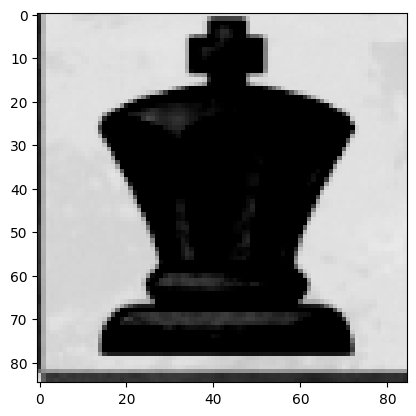

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Class: queen | Predicted: king


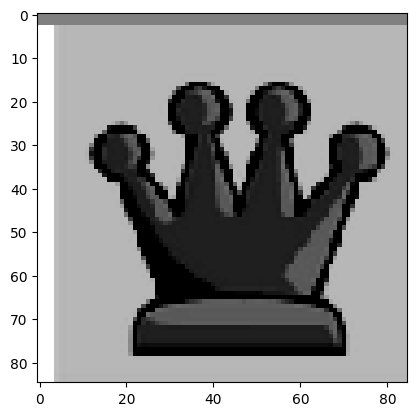

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Class: knight | Predicted: pawn


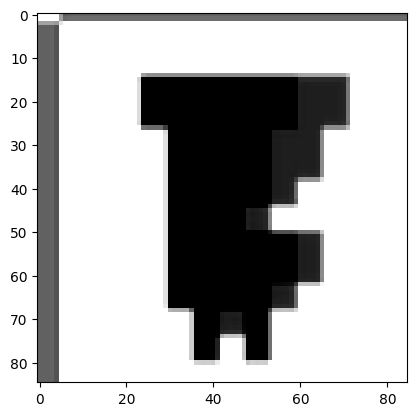

Accuracy of the Model: 97.00 %
Accuracy of king: 83.33 %
Accuracy of pawn: 100.00 %
Accuracy of rook: 100.00 %
Accuracy of queen: 83.33 %
Accuracy of bishop: 100.00 %
Accuracy of knight: 92.86 %


In [8]:
# Train the Model
CNN.model.train_model(model, train_loader, criterion, optimizer, num_epochs, device=GPU)

# Save the Model
SAVE_PATH = './chess.pth'
torch.save(model.state_dict(), SAVE_PATH)

# Test the Model
res = CNN.model.load_model(model, test_loader, CATEGORIES, show_wrongs=True)